In [130]:
import os
import sys
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)
from results_data import ResultsCELI
from results_data import open_pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

globalfont = 'DejaVu Sans'

In [131]:
matplotlib.font_manager.findfont('Cambria')

'/home/jonathon/miniconda3/envs/openmc-env/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [132]:
out = open_pkl(filename='hom_case1_675kNPG_alpha075.pkl')

In [133]:
# available functions:
# out.print_case_settings()
# out.get_BOS_keffs()
# out.get_BOS_isotope()
# out.get_BOS_power()
# out.get_corrector_keffs()
# out.get_BOS_AO
# need to make:
# out.get_corrector_power()
# out.get_corrector_isotope()

In [134]:
out.print_case_settings()

fissionable_mats: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]
fissionable_mats_vols: [60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574]
residual_number_density: 1e-20
include_non_fission_material_power: True
print_transport_powers: True
system_IHM_mass_grams: 72133.56
specific_power: [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
steplength_days: [0.5, 2, 2.5, 5, 10, 10, 10, 10, 20, 20, 20, 20, 20, 50, 50, 50, 50]
origen_predictor_divs: 2
addnuxdictbase: addnuxDicts/addnux3Dict.dict
base_triton: homogenized_base.inp
origen_base: baseOrigenFile.inp
origenResults_F71dir: OrigenResults_F71dir
MonteCarloResults_F33dir: MonteCarloResults_F33
Nprocs: 70
machinefile: nodes.1533811
tmp

In [135]:
BOS_keffs, BOS_sigmas, bu, time = out.get_BOS_keffs()

In [136]:
u5, bu, time = out.get_BOS_isotope(material_id=101, isotope='U-235')

In [137]:
out.get_corrector_keffs(step_num=0)

No corrector iterated keffs for step 0 since we did not do correc to iterations to get to this result.


(None, None)

In [138]:
out.keff_all

{0: {-1: ' best estimate system k-eff 1.233422 + or - 0.000065\n',
  0: ' best estimate system k-eff 1.199648 + or - 0.000060\n',
  1: ' best estimate system k-eff 1.199521 + or - 0.000063\n',
  2: ' best estimate system k-eff 1.199385 + or - 0.000056\n'},
 1: {-1: ' best estimate system k-eff 1.199430 + or - 0.000051\n',
  0: ' best estimate system k-eff 1.179540 + or - 0.000052\n',
  1: ' best estimate system k-eff 1.179490 + or - 0.000053\n',
  2: ' best estimate system k-eff 1.179356 + or - 0.000059\n'},
 2: {-1: ' best estimate system k-eff 1.179341 + or - 0.000057\n',
  0: ' best estimate system k-eff 1.174409 + or - 0.000052\n',
  1: ' best estimate system k-eff 1.174258 + or - 0.000065\n',
  2: ' best estimate system k-eff 1.174383 + or - 0.000050\n'},
 3: {-1: ' best estimate system k-eff 1.174177 + or - 0.000056\n',
  0: ' best estimate system k-eff 1.167089 + or - 0.000056\n',
  1: ' best estimate system k-eff 1.166974 + or - 0.000056\n',
  2: ' best estimate system k-eff 1.

In [139]:
out.print_methods()

available methods for postprocessing results:
out.print_case_settings()
out.get_BOS_keffs()
out.get_BOS_isotope()
out.get_BOS_power()
out.get_corrector_keffs()
out.get_BOS_AO

Plotting:
out.plot_BOS_power_map
out.plot_BOS_power_2d
out.plot_all_power_map
out.plot_BOS_isotopics_map
out.plot_BOS_ao



Need to make the following still
out.get_corrector_power()
out.get_corrector_isotope()
out.get_corrector_AO()


In [140]:
_, _, p = out.get_BOS_power()
p[0].values()

dict_values([0.026490000000000003, 0.038575000000000005, 0.051304999999999996, 0.06250499999999999, 0.07187500000000001, 0.079085, 0.083935, 0.086385, 0.086365, 0.08381999999999999, 0.07875, 0.07146, 0.06220500000000001, 0.0511, 0.03852, 0.026484999999999998])

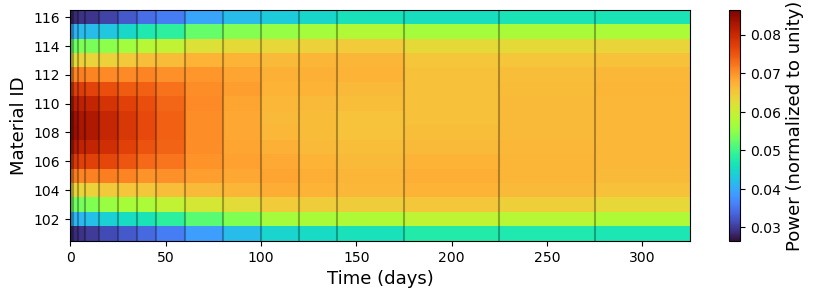

In [141]:
parr, BOS_time = out.plot_BOS_power_map(normalize=True, figsize=(10,3), cmap='turbo', fontname=globalfont,fontsize=13)

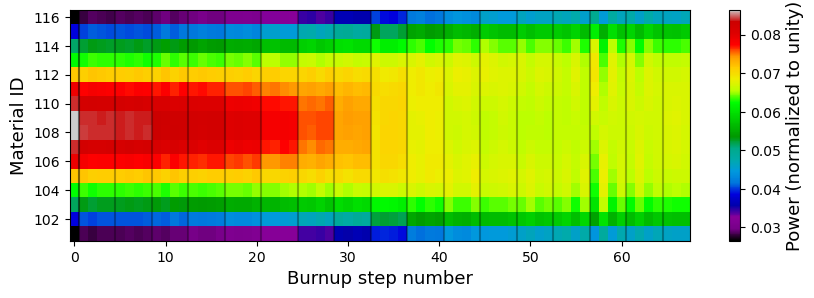

In [142]:
parr = out.plot_all_power_map(normalize=True, figsize=(10,3), cmap='nipy_spectral', fontsize=13, fontname=globalfont)

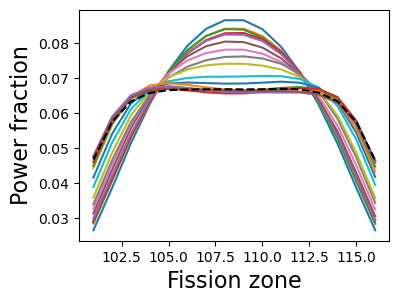

In [143]:
parr, BOS_time = out.plot_BOS_power_2d(normalize=True, figsize=(4,3), fontname=globalfont,fontsize=16)

findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.


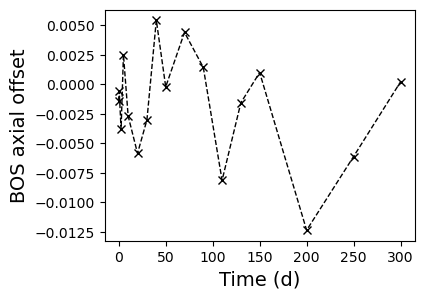

In [144]:
out.plot_BOS_ao(timeOnX=True, figsize=(4,3))

findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.


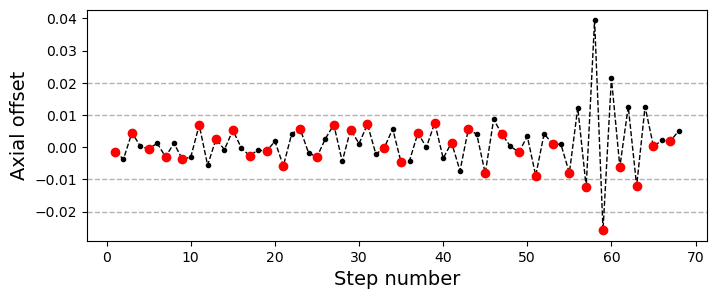

In [145]:
out.plot_all_ao(figsize=( 8,3), mod=2, fontsize=14, fontname='Cambria', extraLines=[-0.02, -0.01, 0.02, 0.01])

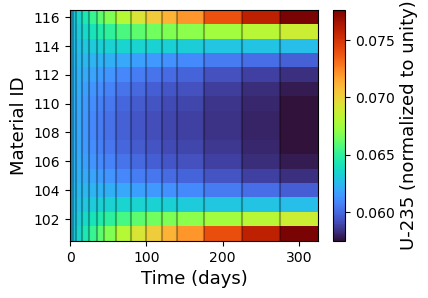

In [146]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

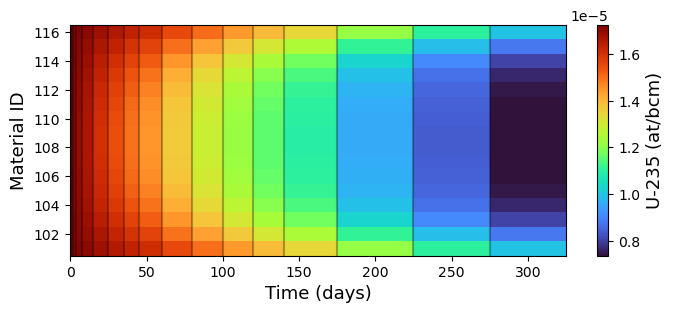

In [147]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=False, figsize=(8,3), cmap='turbo', fontsize=13, fontname=globalfont)

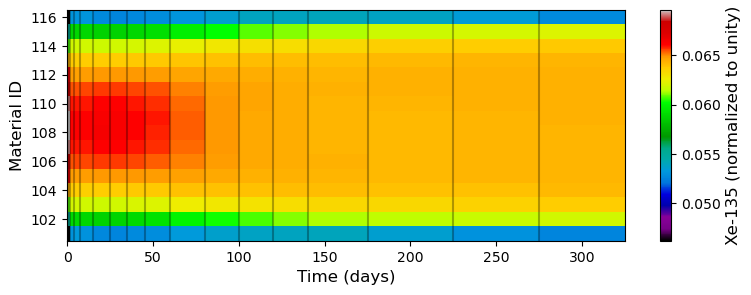

In [148]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(9,3), cmap='nipy_spectral', fontsize=12, fontname=globalfont)

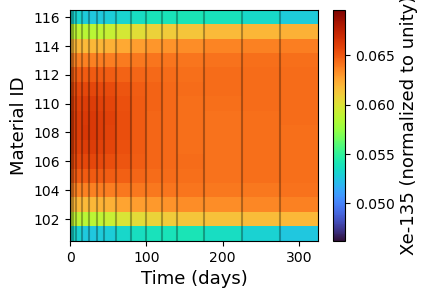

In [149]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

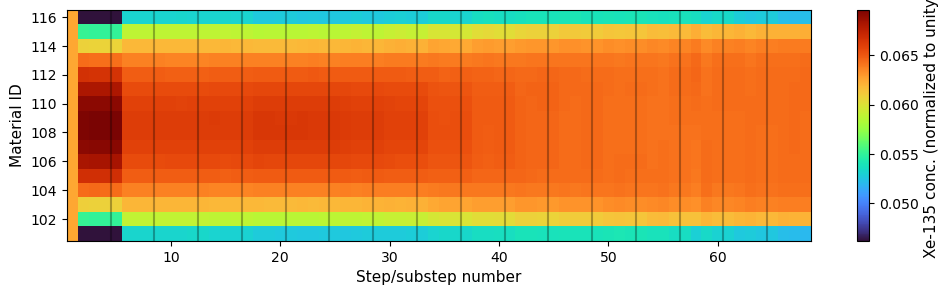

In [150]:
parr = out.plot_all_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(12,3), cmap='turbo', fontsize=11, fontname=globalfont)

[np.float64(-0.125),
 np.float64(-0.1387894014744706),
 np.float64(-0.13844342042171415),
 np.float64(-0.13853780883102057),
 np.float64(-0.13853780883102057),
 np.float64(-0.13202445526578527),
 np.float64(-0.13209146058599436),
 np.float64(-0.13204870850404749),
 np.float64(-0.13204870850404749),
 np.float64(-0.13156457606799887),
 np.float64(-0.13174020830384142),
 np.float64(-0.13156397750400461),
 np.float64(-0.13156397750400461),
 np.float64(-0.1324268153757655),
 np.float64(-0.1328677516624428),
 np.float64(-0.13257754688784357),
 np.float64(-0.13257754688784357),
 np.float64(-0.13236990285804662),
 np.float64(-0.13245727458761097),
 np.float64(-0.1327558484989937),
 np.float64(-0.1327558484989937),
 np.float64(-0.13271551662808362),
 np.float64(-0.13318111274126326),
 np.float64(-0.13244578219619557),
 np.float64(-0.13244578219619557),
 np.float64(-0.1323917790313312),
 np.float64(-0.1328709483695264),
 np.float64(-0.13178760955814067),
 np.float64(-0.13178760955814067),
 np.fl

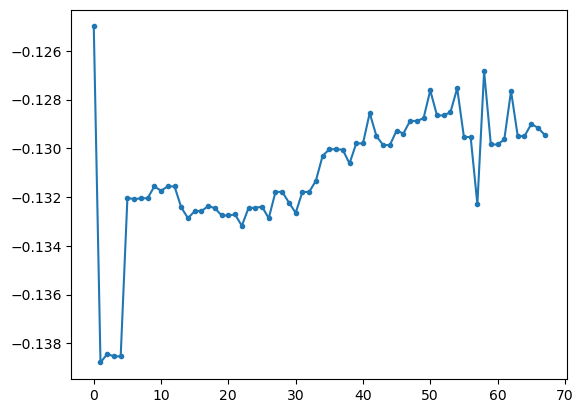

In [151]:
offset = []
for step in range(np.shape(parr)[1]):
  top = 0.0
  bottom = 0.0
  for mat in range(np.shape(parr)[0]):
    if mat <= 6:
      top += parr[mat,step]
    else:
      bottom += parr[mat,step]
  offset += [(top-bottom)/(top+bottom)]
plt.plot(offset, '-o', markersize=3)


offset

findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.


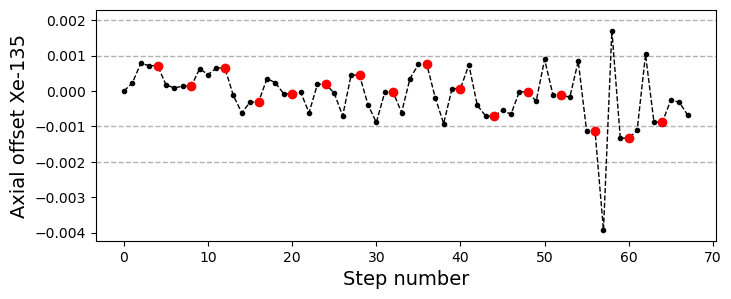

In [152]:
out.plot_all_isotopics_ao(isotope='Xe-135', figsize=(8,3), extraLines=[-0.001, -0.002, 0.002, 0.001])

In [153]:
a = []
a += [1]
a += [5]
a


[1, 5]

In [154]:
np.shape(parr)

(16, 68)

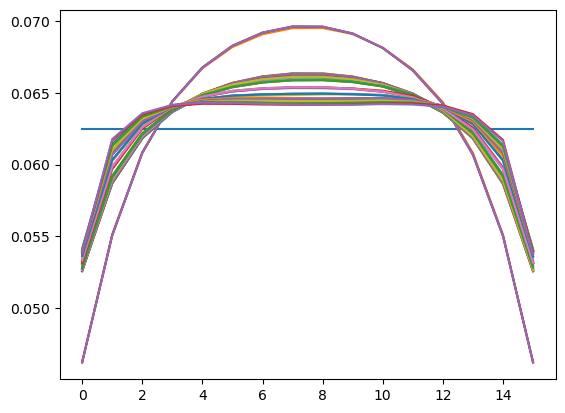

In [155]:
for i in range(55):
  plt.plot(parr[:,i] / sum(parr[:,i]))